In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd
import timeit

In [2]:
np.random.seed(42)

start=timeit.default_timer()


n=50000 # количество циклов
tax_ratio=0.32 # налоговая ставка

# цена упаковки
price=np.array([
    np.random.triangular(5.9,6,6.1,n),
    np.random.triangular(5.95,6.05,6.15,n),
    np.random.triangular(6.0,6.2,6.5,n)])

# объем продаж
value=np.array([
    np.random.normal(802000,25,n),
    np.random.normal(967000,30,n),
    np.random.normal(1132000,25,n)])

unit_cost = np.random.triangular(0.5,0.55,0.65,(3,n)) # процент себестоимости
operating_cost_ratio = np.random.normal(0.15,0.02,(3,n)) # процент операционных издержек
revenue = price * value # выручка
cost_price = unit_cost*revenue # себестоимость
gross_profit = revenue-cost_price # выловая прибыль
transaction_costs = operating_cost_ratio * gross_profit
neat_income_tax = gross_profit - transaction_costs
tax =  tax_ratio * neat_income_tax
neat_income = neat_income_tax - tax

net_in=np.vstack((np.full(n, -3400000.),neat_income))

NPV = np.array([npf.npv(0.1,cf) for cf in net_in.T])
IRR = np.array([npf.irr(cf) for cf in net_in.T])

print("время расчета: ",timeit.default_timer()-start)

per=[10, 50, 90]
q_position_npv = { i: np.percentile(NPV, i).round(2) for i in  per}
q_position_irr = { i: np.percentile(IRR, i).round(3) for i in  per}
npv_mean=np.mean(NPV).round(2)
irr_mean=np.mean(IRR).round(3)
print('----------------------------')
print('мат.ожидание npv:',npv_mean)
print("npv перцентили:") 
display(pd.Series(q_position_npv))
print('----------------------------')
print('мат.ожидание irr (в процентах):',(irr_mean*100).round(1))
print("irr перцентили (в процентах):") 
display(pd.Series(q_position_irr)*100)

время расчета:  3.492782133995206
----------------------------
мат.ожидание npv: 235083.15
npv перцентили:


10     24029.72
50    238651.30
90    441138.66
dtype: float64

----------------------------
мат.ожидание irr (в процентах): 13.6
irr перцентили (в процентах):


10    10.4
50    13.7
90    16.8
dtype: float64

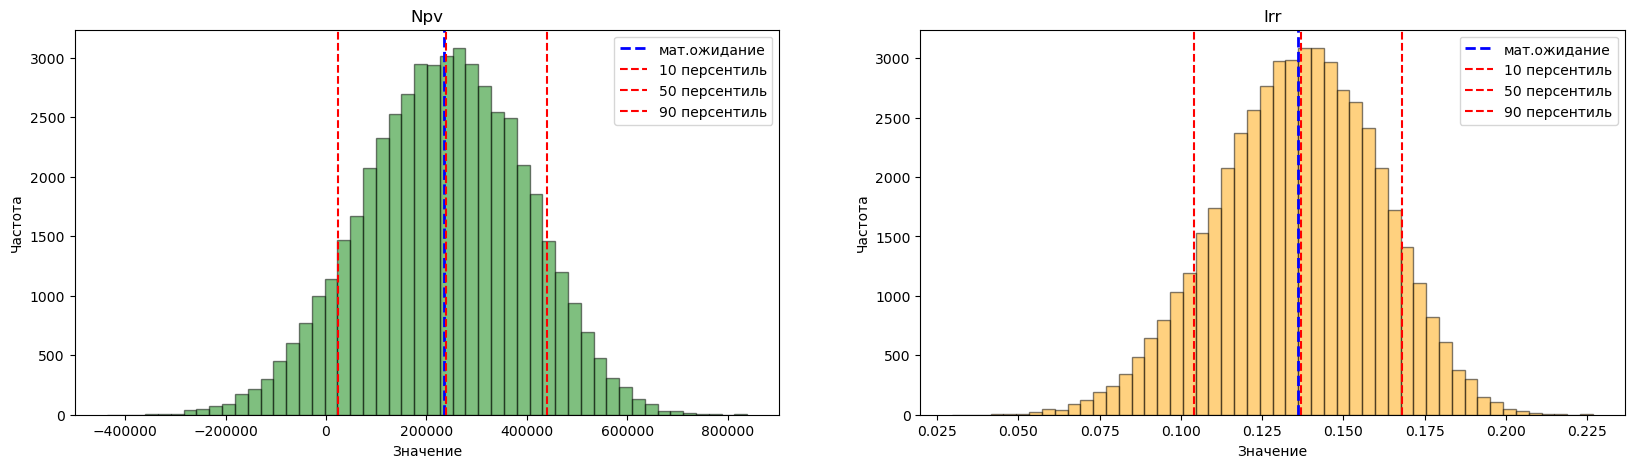

In [17]:
fig,ax = plt.subplots(1,2, figsize=(20,5))

ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Частота')
ax[0].hist(NPV, bins=50,color='green',alpha=0.5,edgecolor='black')
ax[0].set_title(r'Npv')
ax[0].axvline(npv_mean,color='b',linewidth=2, linestyle='--',label='мат.ожидание')
for q in q_position_npv.keys():
    ax[0].axvline(x=q_position_npv[q], color='r', linestyle='--', label='%s персентиль'%q)
ax[0].legend()
ax[1].set_xlabel('Значение')
ax[1].set_ylabel('Частота')
ax[1].hist(IRR, bins=50,color='orange',alpha=0.5,edgecolor='black')
ax[1].set_title("Irr")
ax[1].axvline(irr_mean,color='b',linewidth=2, linestyle='--',label='мат.ожидание')
for q in q_position_irr.keys():
    ax[1].axvline(x=q_position_irr[q], color='r', linestyle='--', label='%s персентиль'%q)
ax[1].legend()
plt.show();

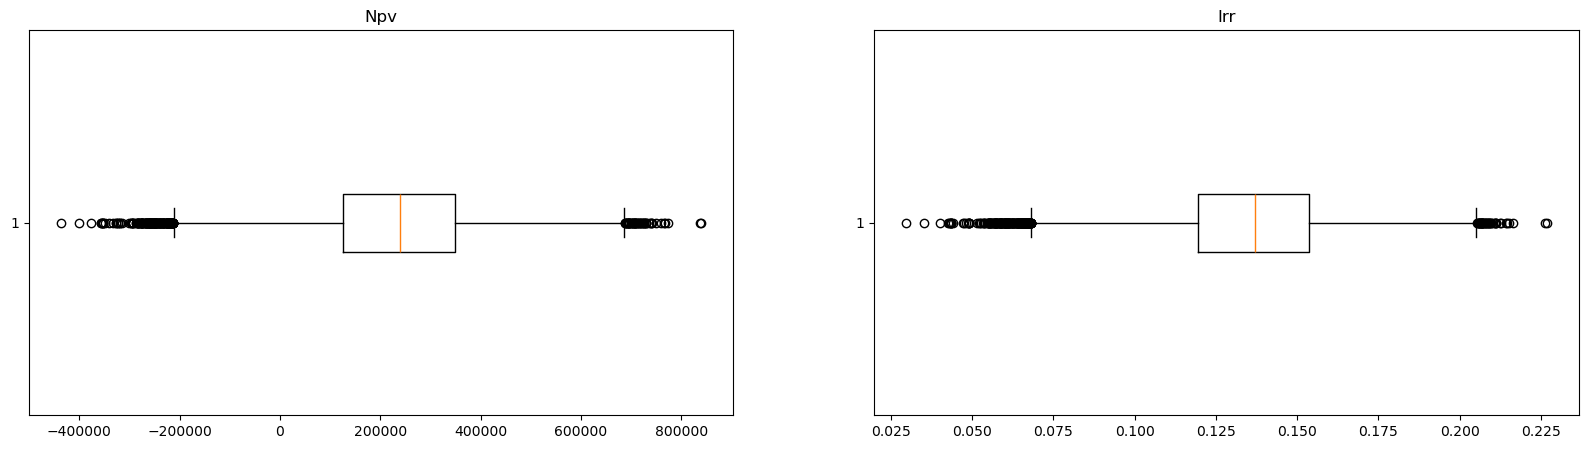

In [19]:
fig,bx = plt.subplots(1,2, figsize=(20,5))
bx[0].boxplot(NPV, vert=False)
bx[0].set_title("Npv")
bx[1].boxplot(IRR, vert=False)
bx[1].set_title("Irr")
plt.show()

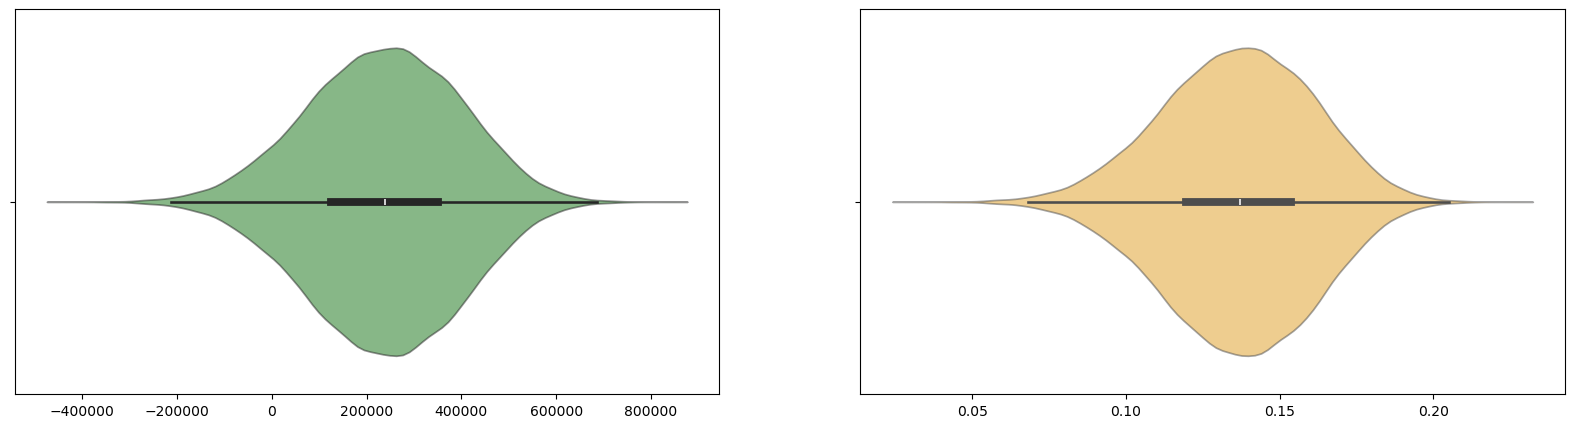

In [21]:
import seaborn as sns
fig, (vx1, vx2) = plt.subplots(1,2, figsize=(20,5))
sns.violinplot(x=NPV, color='green', alpha=0.5, ax=vx1)
sns.violinplot(x=IRR, color='orange',alpha=0.5, ax=vx2);